## Simples regressão linear

Regressão linear ajuda a entender a relação entre duas variáveis. As variáveis independentes que é o recurso disponível para fazer a previsão e os rótulos que são variáveis dependentes.  

In [81]:
# importar bibliotecas
import torch  
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

In [82]:
w = torch.tensor(2.0,requires_grad=True)     #Inclinação da reta
b = torch.tensor(-1.0,requires_grad=True)    #Viés da reta

In [83]:
# Equação determinada por w e b de uma regressão linear 
def forward(x):
    y = w*x+b
    return y 

In [84]:
# cria-se uma variável x independete para obter a variável dependente através da equação
x = torch.tensor([[1.0],[2.0]])
# previsão através da equação já conhecida
yhat = forward(x)
print(f'previsão: {yhat}')

previsão: tensor([[1.],
        [3.]], grad_fn=<AddBackward0>)


In [85]:
# Construtor linear para produzir um modelo linear com Pytorch
from torch.nn import Linear
torch.manual_seed(1)                             #semente para atribuição de valores aleatórios iníciais aos parametros lineares
model = Linear(in_features=1,out_features=1)      #modelo linear, com 1 variável independente e 1 variável dependente
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [86]:
# Testando o modelo
x=torch.tensor([[1.0],[2.0]])
yhat=model(x)                      #fazendo os calculos
print(yhat)

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)


In [87]:
# Modelos personalizados
import torch.nn as nn
class LR(nn.Module):

    # Constructor
    def __init__(self, input_size, output_size):

        # Inherit from parent
        super(LR, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    # Prediction function
    def forward(self, x):
        out = self.linear(x)
        return out

lr = LR(1, 1)

X= torch.tensor([[1.0], [2.0], [3.0]])

yhat=lr(X)
print(yhat)
print('Dicionario pyhton: ', lr.state_dict())

tensor([[ 0.2755],
        [ 0.0816],
        [-0.1122]], grad_fn=<AddmmBackward>)
Dicionario pyhton:  OrderedDict([('linear.weight', tensor([[-0.1939]])), ('linear.bias', tensor([0.4694]))])


## Treinamento da regressão linear

O treinamento é realizado minimizando o erro que é resultado da função custo. A forma de minimizar o erro é encontrar a derivada parcial da função custo e encontrar os parametros que resultem igual a zero, conhecido como descida do gradiente.

### Aplicando a descida do gradiente para encontrar w

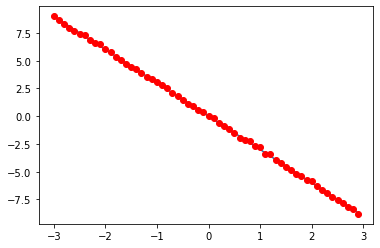

In [88]:
# Descida do gradiente
w = torch.tensor(-10.0,requires_grad=True)
X = torch.arange(-3,3,0.1).view(-1,1)
f =-3*X
# Platando a gráfico da equação linear f
plt.plot(X.numpy(),f.numpy())
Y = f + 0.1 * torch.randn(X.size())
plt.plot(X.numpy(),Y.numpy(),'ro')
plt.show()

In [89]:
# The class for plotting

class plot_diagram():
    
    # Constructor
    def __init__(self, X, Y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        self.X = X.numpy()
        self.Y = Y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.Loss_function = [criterion(forward(X), Y) for w.data in self.parameter_values] 
        w.data = start
        
    # Executor
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        plt.plot(self.parameter_values.numpy(), self.Loss_function)   
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()
    
    # Destructor
    def __del__(self):
        plt.close('all')

In [90]:
# função da geral da equação f
def forward(x):
    return w*x
# Erro medio quadratico
def criterion(yhat,y):
    return torch.mean((yhat-y)**2)
# parametros
LOSS = []
lr = 0.1                                     # taxa de aprendizagem
gradient_plot = plot_diagram(X, Y, w, stop = 5)
# Define a function for train the model

def train_model(iter):
    for epoch in range (iter):
        
        # make the prediction as we learned in the last lab
        Yhat = forward(X)
        
        # calculate the iteration
        loss = criterion(Yhat,Y)
        
        # plot the diagram for us to have a better idea
        gradient_plot(Yhat, w, loss.item(), epoch)
        
        # store the loss into list
        LOSS.append(loss.item())
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # updata parameters
        w.data = w.data - lr * w.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()

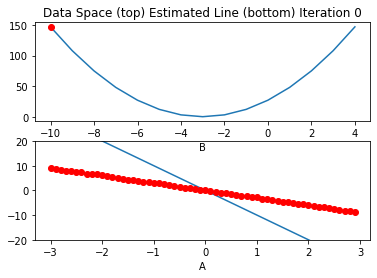

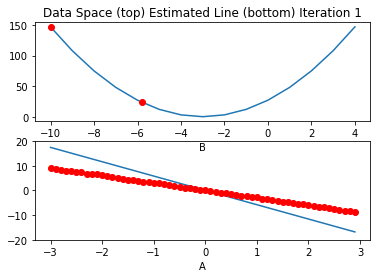

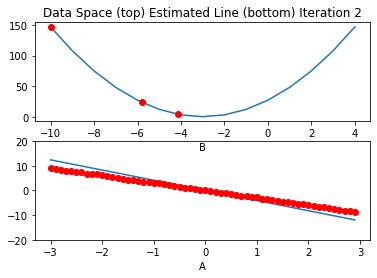

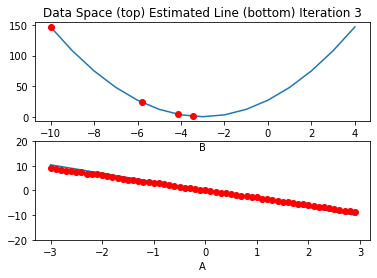

<Figure size 432x288 with 0 Axes>

In [91]:
# Give 4 iterations for training the model here.

train_model(4)

Text(23.875, 0.5, 'Cost')

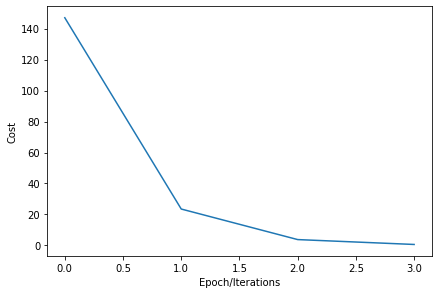

In [92]:
# Plot the loss for each iteration

plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

### Aplicando a descida do gradiente para encontrar w e b

In [93]:
# The class for plot the diagram

class plot_error_surfaces(object):
    
    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30,30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1,cmap = 'viridis', edgecolor = 'none')
            plt.title('Cost/Total Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Cost/Total Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
    
    # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W,self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w,self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
    
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label="training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))

        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Total Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

<Figure size 432x288 with 0 Axes>

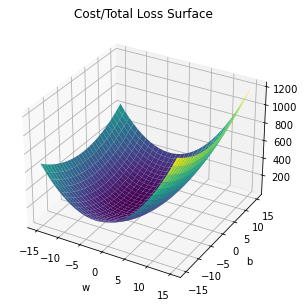

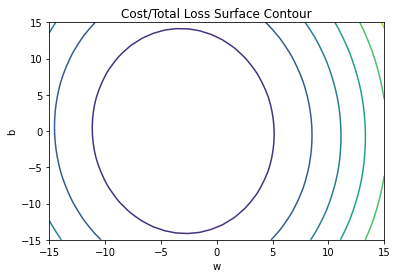

In [94]:
# Define the forward function

def forward(x):
    return w * x + b
# Create plot_error_surfaces for viewing the data

get_surface = plot_error_surfaces(15, 15, X, Y, 30)

In [95]:
# Define the parameters w, b for y = wx + b

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
# Define learning rate and create an empty list for containing the loss for each iteration.

lr = 0.1
LOSS = []

In [96]:
# The function for training the model

def train_model(iter):
    
    # Loop
    for epoch in range(iter):
        
        # make a prediction
        Yhat = forward(X)
        
        # calculate the loss 
        loss = criterion(Yhat, Y)

        # Section for plotting
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        if epoch % 3 == 0:
            get_surface.plot_ps()
            
        # store the loss in the list LOSS
        LOSS.append(loss)
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # update parameters slope and bias
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()
        b.grad.data.zero_()

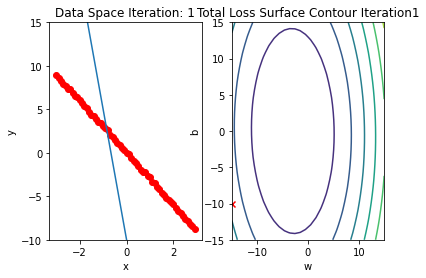

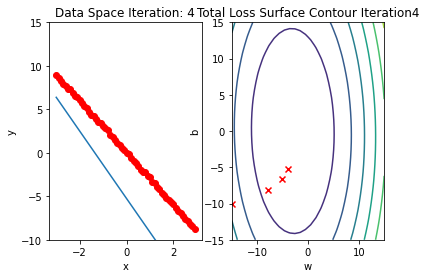

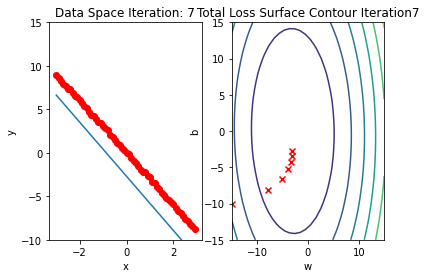

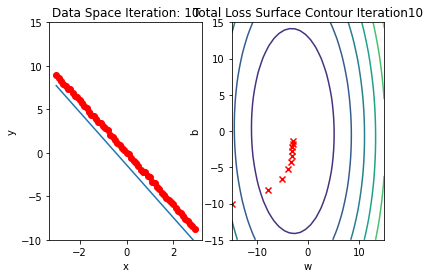

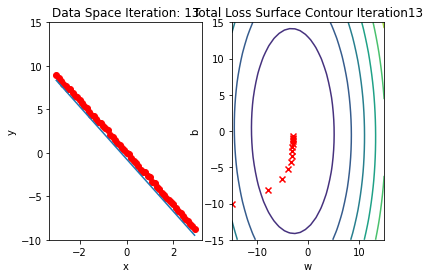

In [97]:
# Train the model with 15 iterations

train_model(15)

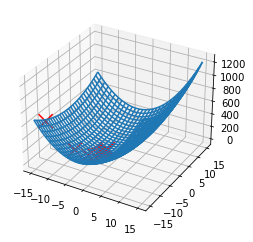

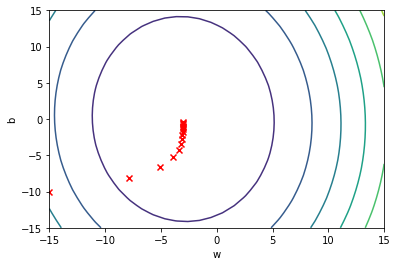

Text(23.875, 0.5, 'Cost')

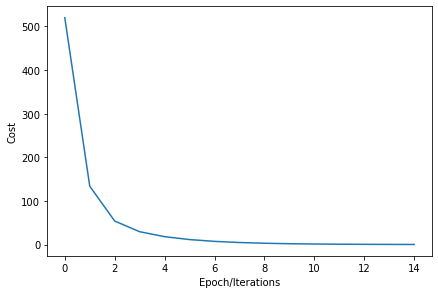

In [98]:
# Plot out the Loss Result

get_surface.final_plot()
plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

### Descida do gradiente Estocastico

In [99]:
# The class for plot the diagram

class plot_error_surfaces(object):
    
    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection = '3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1,cmap = 'viridis', edgecolor = 'none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
    
    # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
    
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label = "training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

In [100]:
# Define the parameters w, b for y = wx + b

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
# Define learning rate and create an empty list for containing the loss for each iteration.

lr = 0.1
LOSS_BGD = []

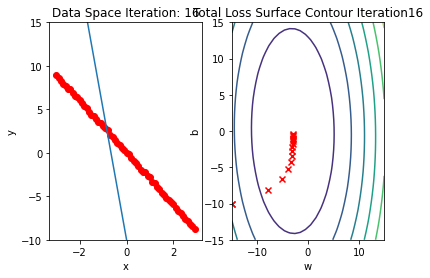

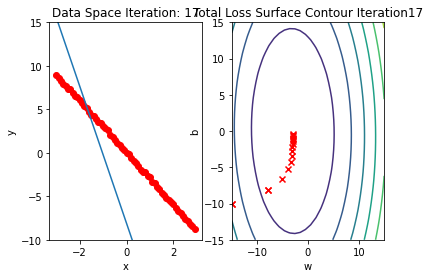

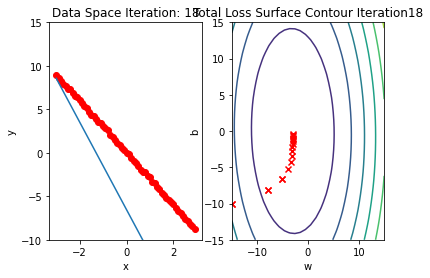

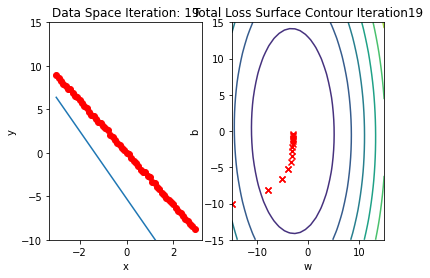

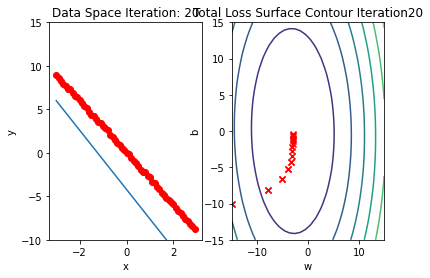

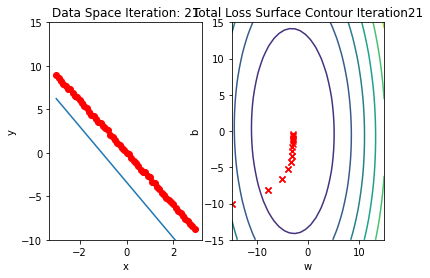

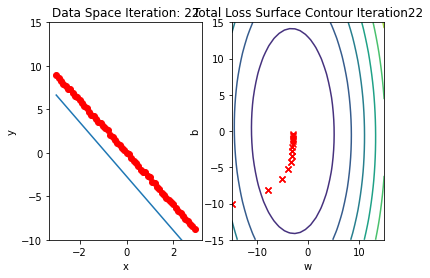

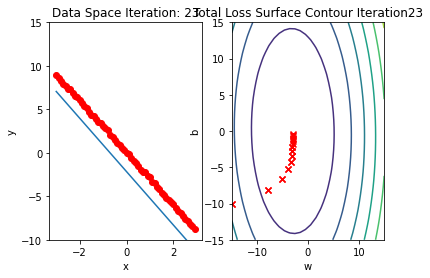

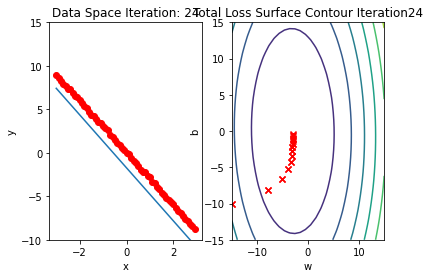

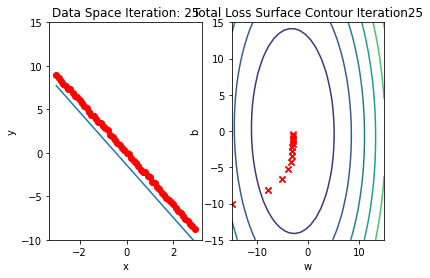

In [101]:
# The function for training the model

def train_model(iter):
    
    # Loop
    for epoch in range(iter):
        
        # make a prediction
        Yhat = forward(X)
        
        # calculate the loss 
        loss = criterion(Yhat, Y)

        # Section for plotting
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        get_surface.plot_ps()
            
        # store the loss in the list LOSS_BGD
        LOSS_BGD.append(loss)
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # update parameters slope and bias
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()
        b.grad.data.zero_()
# Train the model with 10 iterations

train_model(10)

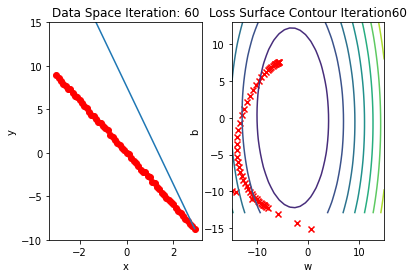

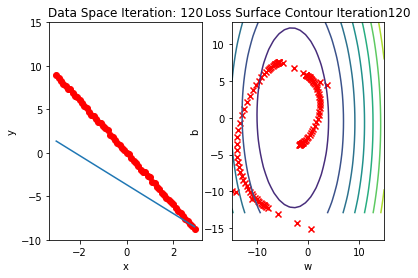

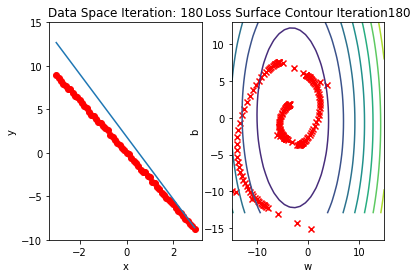

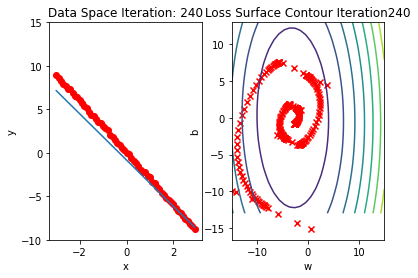

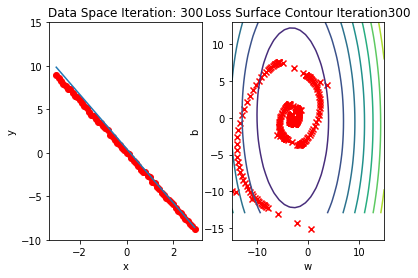

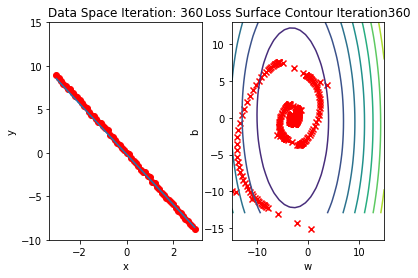

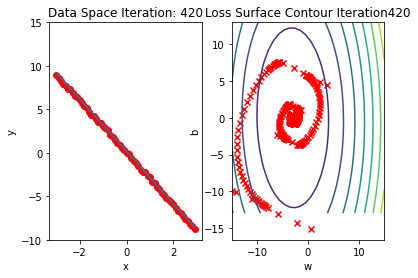

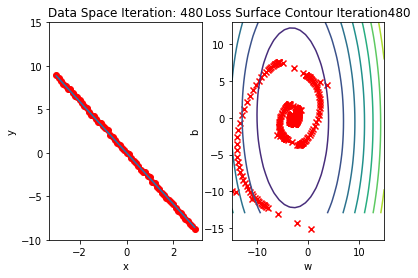

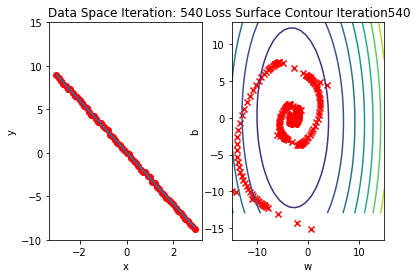

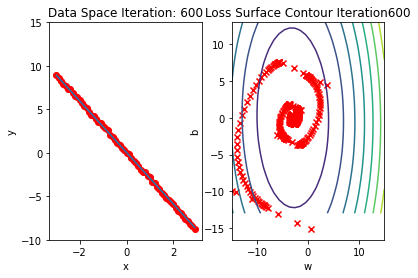

In [102]:
# Create plot_error_surfaces for viewing the data

get_surface = plot_error_surfaces(15, 13, X, Y, 30, go = False)
# The function for training the model

LOSS_SGD = []
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

def train_model_SGD(iter):
    
    # Loop
    for epoch in range(iter):
        
        # SGD is an approximation of out true total loss/cost, in this line of code we calculate our true loss/cost and store it
        Yhat = forward(X)

        # store the loss 
        LOSS_SGD.append(criterion(Yhat, Y).tolist())
        
        for x, y in zip(X, Y):
            
            # make a pridiction
            yhat = forward(x)
        
            # calculate the loss 
            loss = criterion(yhat, y)

            # Section for plotting
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        
            # backward pass: compute gradient of the loss with respect to all the learnable parameters
            loss.backward()
        
            # update parameters slope and bias
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data

            # zero the gradients before running the backward pass
            w.grad.data.zero_()
            b.grad.data.zero_()
            
        #plot surface and data space after each epoch    
        get_surface.plot_ps()
# Train the model with 10 iterations

train_model_SGD(10)

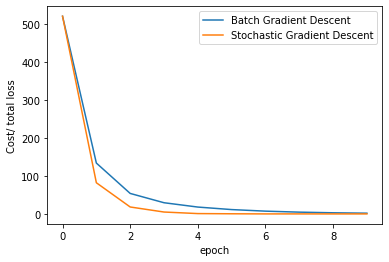

In [103]:
# Plot out the LOSS_BGD and LOSS_SGD

plt.plot(LOSS_BGD,label = "Batch Gradient Descent")
plt.plot(LOSS_SGD,label = "Stochastic Gradient Descent")
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()

In [104]:
## Otimizador Pytorch

In [105]:
# Create Data Class

from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.f = 1 * self.x - 1
        self.y = self.f + 0.1 * torch.randn(self.x.size())
        self.len = self.x.shape[0]
        
    # Getter
    def __getitem__(self,index):    
        return self.x[index],self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

In [106]:
# Criar o objeto de dados
dataset = Data()

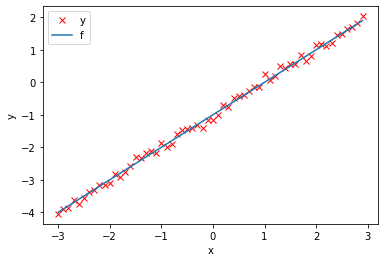

In [107]:
# Plot the data

plt.plot(dataset.x.numpy(), dataset.y.numpy(), 'rx', label = 'y')
plt.plot(dataset.x.numpy(), dataset.f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [108]:
# Create a linear regression model class

from torch import nn, optim

class linear_regression(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    # Prediction
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [109]:
# Build in cost function

criterion = nn.MSELoss()

In [110]:
# Create optimizer

model = linear_regression(1,1)
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [111]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.5842]], requires_grad=True),
 Parameter containing:
 tensor([-0.4277], requires_grad=True)]

In [112]:
optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.01,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'params': [0, 1]}]}

In [113]:
# Customize the weight and bias

model.state_dict()['linear.weight'][0] = -15
model.state_dict()['linear.bias'][0] = -10

In [114]:
# Create plot surface object

get_surface = plot_error_surfaces(15, 13, dataset.x, dataset.y, 30, go = False)

In [115]:
trainloader = DataLoader(dataset = dataset, batch_size = 1)

In [116]:
# Train Model

def train_model_BGD(iter):
    for epoch in range(iter):
        for x,y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            get_surface.set_para_loss(model, loss.tolist())          
            optimizer.zero_grad()
            loss.backward()

            optimizer.step()
        get_surface.plot_ps()


train_model_BGD(10)

TypeError: set_para_loss() missing 1 required positional argument: 'loss'